# Sentiment Analysis using Deep Learning

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ei9btqab
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ei9btqab
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=2b186ccf7db2487f7d3df7417ea47bf81a0bc8e32d416b581b3a08786fb3b852
  Stored in directory: /tmp/pip-ephem-wheel-cache-crrmv0gb/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [4]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 10.4MB 10.1MB/s 
     |████████████████████████████████| 1.1MB 58.8MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 782.7MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.3.1-cp36-none-any.whl size=782936123 sha256=13151a5c02dd84e2b5933f252e247e5ced2f819589a735dc709959fb47b8cd1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-1djesh6s/wheels/ce/4d/1b/bc6cabb6df139c5f0318927be3ae9e51363fb44d6ea328d3f4
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
import pandas as pd
import numpy as np
import spacy

In [6]:
import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Data Preprocessing

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/NLP-Tutorial-8---Sentiment-Classification-using-SpaCy-for-IMDB-and-Amazon-Review-Dataset/master/datasets/imdb_labelled.txt', sep = '\t', header = None)

In [11]:
df.columns = ['reviews', 'sentiment']

In [12]:

df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [13]:
def get_clean(x):
    x = str(x).lower()
    x =  ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_urls(x)
    x =  ps.remove_special_chars(x)
    x = ps.remove_accented_chars(x)
    return x

In [14]:
get_clean('I have an email ertugrulsmz@gmail.com where you will reach on ##')

'i have an email where you will reach on'

In [15]:
df['reviews'] = df['reviews'].apply(lambda x: get_clean(x))

In [16]:
df.head()

,reviews,sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat characters...,0
2,attempting artiness with black white and cleve...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1


### Get the word2vec

```
pip install -U spacy

python -m spacy download en_core_web_lg
```

In [17]:
import en_core_web_lg

In [18]:
nlp = en_core_web_lg.load()

In [19]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [22]:
get_vec('I will come with you').shape

(300,)

In [23]:
df['vec'] = df['reviews'].apply(lambda x: get_vec(x))

In [24]:
df.head()

,reviews,sentiment,vec
0,a very very very slowmoving aimless movie abou...,0,"[-0.065427616, 0.105150685, -0.23944347, 0.127..."
1,not sure who was more lost the flat characters...,0,"[0.07790671, 0.1754548, -0.14305861, -0.021857..."
2,attempting artiness with black white and cleve...,0,"[-0.1621301, 0.004197893, -0.11855656, -0.1021..."
3,very little music or anything to speak of,0,"[-0.09093174, 0.25162372, -0.25681874, 0.15846..."
4,the best scene in the movie was when gerardo i...,1,"[0.08769195, 0.12695198, -0.097915664, -0.0435..."


In [25]:
y = df['sentiment']

In [ ]:
y.shape

In [26]:
X = df['vec'].to_numpy()
X.shape


(748,)

In [29]:
X[0].shape

(300,)

In [33]:
X = X.reshape(-1, 1)

In [34]:
df.shape, X.shape

((748, 3), (748, 1))

In [37]:
np.concatenate(X,axis=0).shape

(224400,)

In [42]:
np.concatenate(X,axis=0).reshape(-1,300).shape

(748, 300)

In [43]:
X = np.concatenate(X,axis=0).reshape(-1,300)

In [44]:
df.shape, X.shape

((748, 3), (748, 300))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [46]:
X_train.shape, X_test.shape

((598, 300), (150, 300))

In [47]:
np.min(X_train)

-2.7673

### Feature Standardization

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
np.min(X_train)

0.0

In [51]:
np.max(X_train)

1.0000001

### ANN Model Building and Traning

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras import Input
from keras import Model

In [60]:
input = Input(shape=X.shape[1])
x = Dense(units = 128, activation='relu')(input)
x = Dense(units = 128, activation='relu')(x)
x = Dense(units = 128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input,outputs = output)


In [61]:
model.compile(optimizer=Adam(lr = 0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit()

In [65]:
model.fit(X_train, y_train, batch_size=4, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
150/150 [==============================] - 1s 4ms/step - loss: 0.3624 - accuracy: 0.8445 - val_loss: 0.5289 - val_accuracy: 0.7333
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8395 - val_loss: 0.5151 - val_accuracy: 0.7600
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8328 - val_loss: 0.5089 - val_accuracy: 0.7333
Epoch 4/20
150/150 [==============================] - 1s 4ms/step - loss: 0.3398 - accuracy: 0.8512 - val_loss: 0.5163 - val_accuracy: 0.7800
Epoch 5/20
150/150 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8595 - val_loss: 0.5035 - val_accuracy: 0.7400
Epoch 6/20
150/150 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8512 - val_loss: 0.5110 - val_accuracy: 0.7733
Epoch 7/20
150/150 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8545 - val_loss: 0.5079 - val_accuracy: 0.7600
Epoch 

### Confusion Matrix Plot

In [76]:
 #!pip install mlxtend

In [78]:
X_test.shape,y_test.shape

((150, 300), (150,))

In [74]:
y_pred = (model.predict(X_test) > 0.5).astype(np.uint8)

In [79]:
confusion_matrix(y_test, y_pred)

array([[54, 19],
       [16, 61]])

In [81]:
from mlxtend.plotting import plot_confusion_matrix

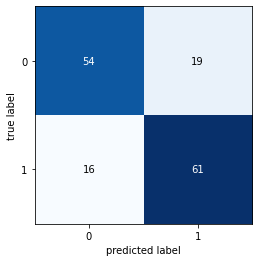

In [82]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        73
           1       0.76      0.79      0.78        77

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



### Setting Custom Threshold

In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
y_pred = model.predict(X_test)

In [87]:
for i in [0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75]:
  classes = [1 if val>i else 0 for val in y_pred]
  print(f"i : {i}  precision : {precision_score(y_test, classes)}, recall : {recall_score(y_test, classes)}")

i : 0.3  precision : 0.7216494845360825, recall : 0.9090909090909091
i : 0.35  precision : 0.717391304347826, recall : 0.8571428571428571
i : 0.4  precision : 0.7325581395348837, recall : 0.8181818181818182
i : 0.45  precision : 0.7682926829268293, recall : 0.8181818181818182
i : 0.5  precision : 0.7625, recall : 0.7922077922077922
i : 0.55  precision : 0.8082191780821918, recall : 0.7662337662337663
i : 0.6  precision : 0.835820895522388, recall : 0.7272727272727273
i : 0.65  precision : 0.859375, recall : 0.7142857142857143
i : 0.7  precision : 0.8888888888888888, recall : 0.6233766233766234
i : 0.75  precision : 0.9, recall : 0.5844155844155844


In [88]:
classes = [1 if val>0.6 else 0 for val in y_pred]

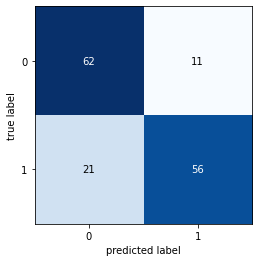

In [89]:
plot_confusion_matrix(confusion_matrix(y_test, classes))
plt.show()

## 1D CNN Model Building and Training

In [90]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout

In [91]:
X_train.shape

(598, 300)

In [92]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [93]:
X_train.shape, X_test.shape

((598, 300, 1), (150, 300, 1))

In [94]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 299, 32)           96        
_________________________________________________________________
batch_normalization (BatchNo (None, 299, 32)           128       
_________________________________________________________________
dropout (Dropout)            (None, 299, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9568)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                612416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [96]:
epochs = 20
model.compile(optimizer=Adam(0.00001), loss = 'binary_crossentropy', metrics= ['accuracy'])
history = model.fit(X_train, y_train, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/20
19/19 [==============================] - 6s 15ms/step - loss: 0.7258 - accuracy: 0.5319 - val_loss: 0.6892 - val_accuracy: 0.5067
Epoch 2/20
19/19 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.5567 - val_loss: 0.6872 - val_accuracy: 0.5067
Epoch 3/20
19/19 [==============================] - 0s 5ms/step - loss: 0.6315 - accuracy: 0.6263 - val_loss: 0.6851 - val_accuracy: 0.5133
Epoch 4/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.6711 - val_loss: 0.6826 - val_accuracy: 0.5067
Epoch 5/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5550 - accuracy: 0.7045 - val_loss: 0.6800 - val_accuracy: 0.5333
Epoch 6/20
19/19 [==============================] - 0s 14ms/step - loss: 0.5603 - accuracy: 0.7134 - val_loss: 0.6769 - val_accuracy: 0.5800
Epoch 7/20
19/19 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7213 - val_loss: 0.6731 - val_accuracy: 0.6200
Epoch 8/20
19/19 [

### Plot Learning Curve

In [97]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [98]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

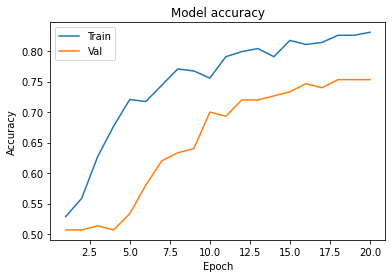

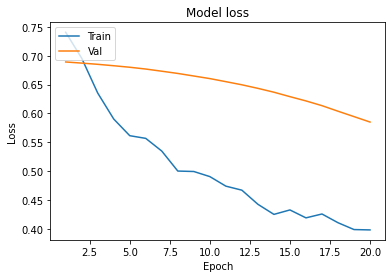

In [99]:
plot_learningCurve(history, epochs)

### Model Load, Store and Testing

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd539facf98>)

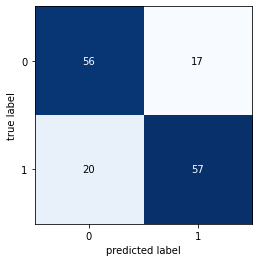

In [100]:
plot_confusion_matrix(confusion_matrix(y_test, model.predict_classes(X_test)))

In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save('cnn', save_format='h5')

In [103]:
model = load_model('cnn')

In [104]:
X_test[0].shape

(300, 1)

In [113]:
def get_pred(x, model, scaler):
  x = get_clean(x)
  vec = get_vec(x).reshape(1, -1)

  vec = scaler.transform(vec)

  vec = vec.reshape(1, 300, 1)
  
  y_pred = model.predict_classes(vec)

  return y_pred


In [114]:
x = 'it was a nice movie. thanks for making it'
get_pred(x, model, scaler)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)